In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [69]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Variable description

### PAY_N
Repayment status (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [70]:
f = open("data/variables.txt", "r")

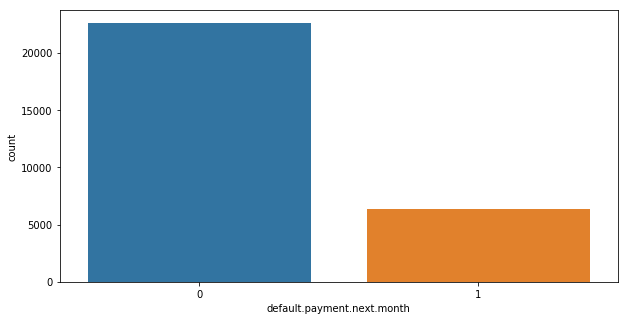

In [71]:
sns.countplot(x='default.payment.next.month',data=train)

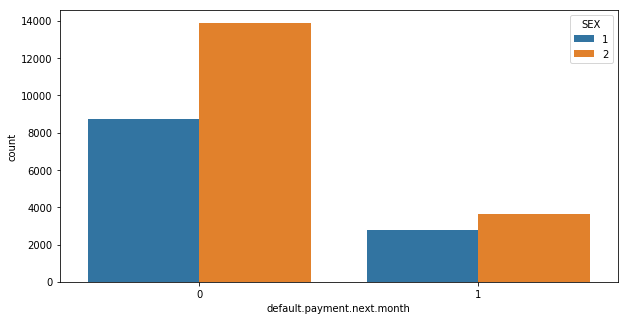

In [72]:
sns.countplot(x='default.payment.next.month',hue='SEX',data=train)

In [12]:
y = 'default.payment.next.month'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 25 columns):
Unnamed: 0                    29000 non-null int64
LIMIT_BAL                     29000 non-null float64
SEX                           29000 non-null int64
EDUCATION                     29000 non-null int64
MARRIAGE                      29000 non-null int64
AGE                           29000 non-null int64
PAY_0                         29000 non-null int64
PAY_2                         29000 non-null int64
PAY_3                         29000 non-null int64
PAY_4                         29000 non-null int64
PAY_5                         29000 non-null int64
PAY_6                         29000 non-null int64
BILL_AMT1                     29000 non-null float64
BILL_AMT2                     29000 non-null float64
BILL_AMT3                     29000 non-null float64
BILL_AMT4                     29000 non-null float64
BILL_AMT5                     29000 non-null float64
BILL_AMT6   

## Train and test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(y,axis=1), 
                                                    train[y], test_size=0.30, 
                                                    random_state=101)

## Logistic regression

             precision    recall  f1-score   support

          0       0.82      0.97      0.89      6760
          1       0.71      0.26      0.38      1940

avg / total       0.80      0.81      0.78      8700



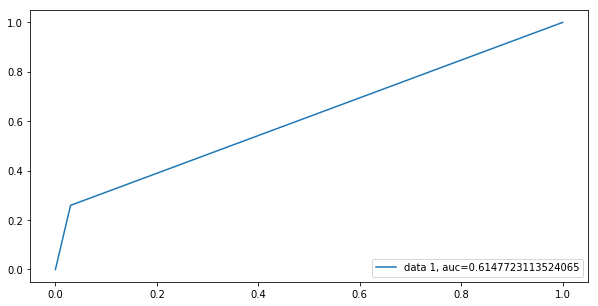

In [81]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions, pos_label=1)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Data normalisation

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic regression again

             precision    recall  f1-score   support

          0       0.82      0.97      0.89      6760
          1       0.71      0.26      0.38      1940

avg / total       0.80      0.81      0.78      8700



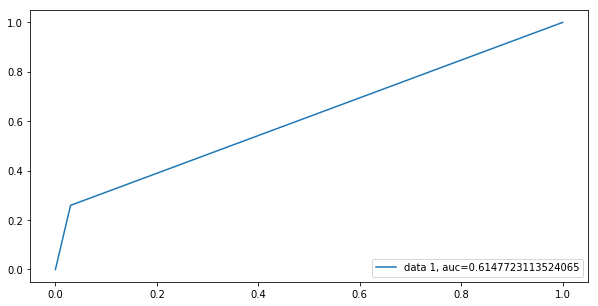

In [78]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions, pos_label=1)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest

             precision    recall  f1-score   support

          0       0.84      0.94      0.89      6760
          1       0.63      0.35      0.45      1940

avg / total       0.79      0.81      0.79      8700



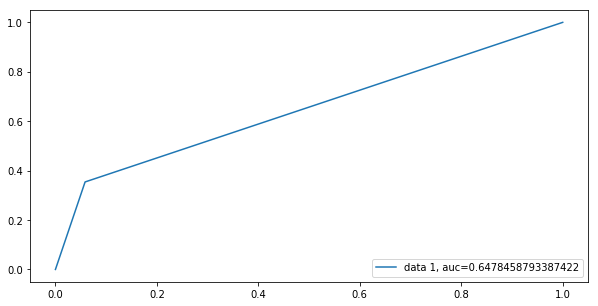

In [82]:
# Train the model
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Evaluate
print(classification_report(y_test,predictions))
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions, pos_label=1)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [84]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

[[6573  187]
 [1449  491]]
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      6760
          1       0.72      0.25      0.38      1940

avg / total       0.80      0.81      0.77      8700



[[6573  187]
 [1449  491]]
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      6760
          1       0.63      0.35      0.45      1940

avg / total       0.79      0.81      0.79      8700



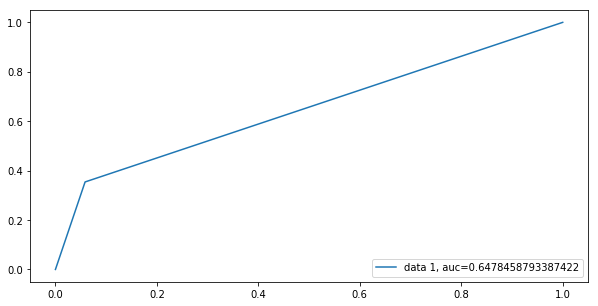

In [85]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,predictions))
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=predictions, pos_label=1)
auc = roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [86]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=12)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,np.round(y_pred)))
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=np.round(y_pred), pos_label=1)
auc = roc_auc_score(y_test, np.round(y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ModuleNotFoundError: No module named 'xgboost'